# Graph generation demo

### Overview

This notebook demonstrates examples of generating random graphs and their analysis using the syngen tool. 
We utilize [Erdos-Renyi](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) model based generators for regular and bipartite graphs. Along with this, we will consider directed and unidirected graphs, so we have the following options:

1. [Directed nonbipartite graphs](#1)
1. [Unidirected nonbipartite graphs](#2)
1. [Directed bipartite graphs](#3)
1. [Unidirected bipartite graphs](#4)

For each type we prepared graph a statistics table, degree distribution plots, and a hop plot.

### Imports

In [1]:
# utils
import math
import numpy as np

# generators
from syngen.generator.graph import RandomGraph, RandomBipartite

# graph statistics 
from syngen.analyzer.graph import Graph
from syngen.analyzer.graph.analyser import AnalysisModule
from syngen.analyzer.graph.stats import get_dd_simmilarity_score

### Helper functions

`generate_graphs` function handles all cases of the graph generation that we are going to present in this notebook. It picks between `RandomBipartite` and `RandomGraph` generators, then fits the chosen one with all all necessary information (is it directed or not), and generates `n` graphs with a given number of nodes and edges. 

Note: In the bipartite scenario, the generator requires the number of nodes in both parts.

In [2]:
def generate_graphs(is_bipartite, nodes, edges, n=3, is_directed=False, noise=0.0, has_self_loop=False):
    generator = RandomBipartite(seed=42) if is_bipartite else RandomGraph(seed=42)
    generator.fit(is_directed=is_directed)
    graphs = []
    for i in range(n):
        if is_bipartite:
            num_nodes_src_set, num_nodes_dst_set = nodes
            num_edges_src_dst, num_edges_dst_src = edges
            graphs.append(generator.generate(num_nodes_src_set, 
                                             num_nodes_dst_set, 
                                             num_edges_src_dst, 
                                             num_edges_dst_src, 
                                             is_directed=is_directed, 
                                             noise=noise))
        else:
            graphs.append(generator.generate(num_nodes=nodes, 
                                             num_edges=edges, 
                                             is_directed=is_directed, 
                                             has_self_loop=has_self_loop, 
                                             noise=noise))
    return graphs

We use [SNAP](https://snap.stanford.edu/) library for the graph analysis, so we need to convert the generated graphs to the appropriate format.

In [3]:
def convert_to_snap(graphs, name, is_directed):
    snap_graphs = []
    for i, graph in enumerate(graphs):
        path = f'/workspace/data/er_{name}_{i}.txt'
        np.savetxt(path, graph, fmt='%i', delimiter='\t')
        snap_graphs.append(Graph(path, name=f'{name}_{i}', load_eagerly=True, is_directed=is_directed))
    return snap_graphs

In [4]:
def analyze(snap_graphs):
    graph_analyser = AnalysisModule()
    df = graph_analyser.compare_graph_stats(*snap_graphs)
    fig = graph_analyser.compare_graph_plots(*snap_graphs)
    return df

## Graph Generation

<a id="1"></a>
### Directed nonbipartite graphs

,Category,Statistic,directed_nonbipartite_0,directed_nonbipartite_1,directed_nonbipartite_2
0,Global stats,Nodes,8191,8192,8192
1,Global stats,Edges,65536,65536,65536
2,Global stats,Density,0.001,0.001,0.001
3,Global stats,Average degree,8,8,8
4,Global stats,Zero deg nodes,0,0,0
5,Global stats,Zero in deg nodes,4,2,1
6,Global stats,Zero out deg nodes,1362,1349,1372
7,Global stats,Self loops,0,0,0
8,Global stats,Bidirectional edges,37,38,32
9,Global stats,Unique undirected edges,65499,65498,65504


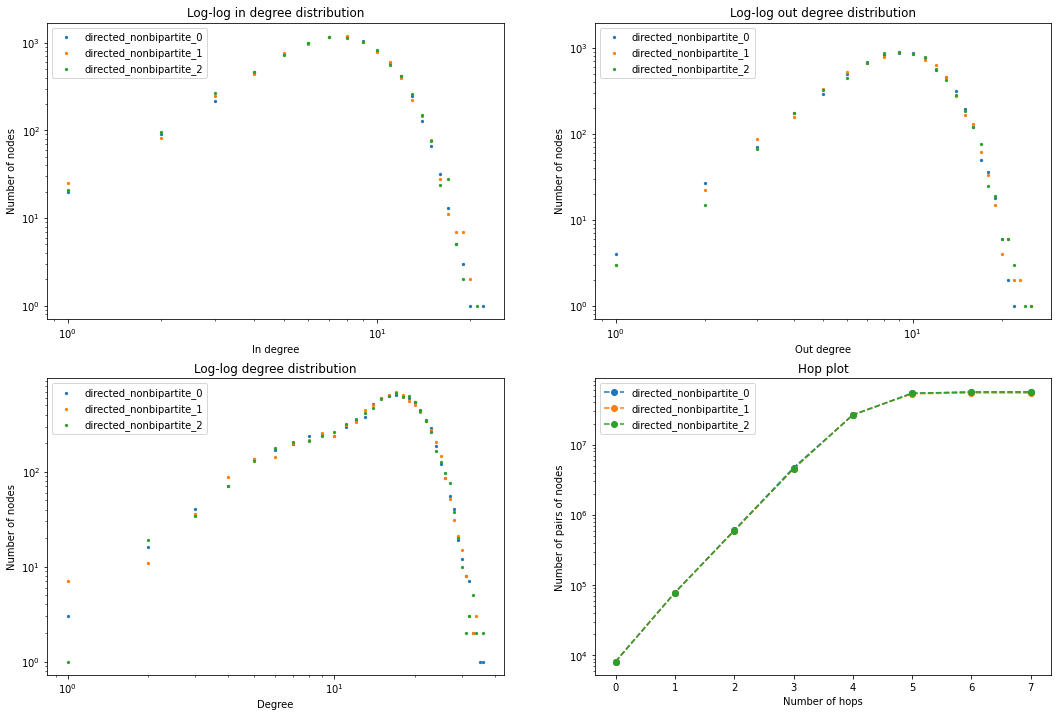

In [5]:
is_directed = True
is_bipartite = False
nodes = 2 ** 13
edges = 2 ** 16
graphs = generate_graphs(is_bipartite=is_bipartite, nodes=nodes, edges=edges, is_directed=is_directed)
graphs = convert_to_snap(graphs, 'directed_nonbipartite', is_directed=is_directed)
analyze(graphs)

### Directed nonbipartite graphs with noise

,Category,Statistic,directed_nonbipartite_n_0,directed_nonbipartite_n_1,directed_nonbipartite_n_2
0,Global stats,Nodes,8184,8177,8188
1,Global stats,Edges,65536,65536,65536
2,Global stats,Density,0.001,0.001,0.001
3,Global stats,Average degree,8.01,8.01,8
4,Global stats,Zero deg nodes,0,0,0
5,Global stats,Zero in deg nodes,202,112,68
6,Global stats,Zero out deg nodes,1259,983,1355
7,Global stats,Self loops,0,0,0
8,Global stats,Bidirectional edges,29,39,44
9,Global stats,Unique undirected edges,65507,65497,65492


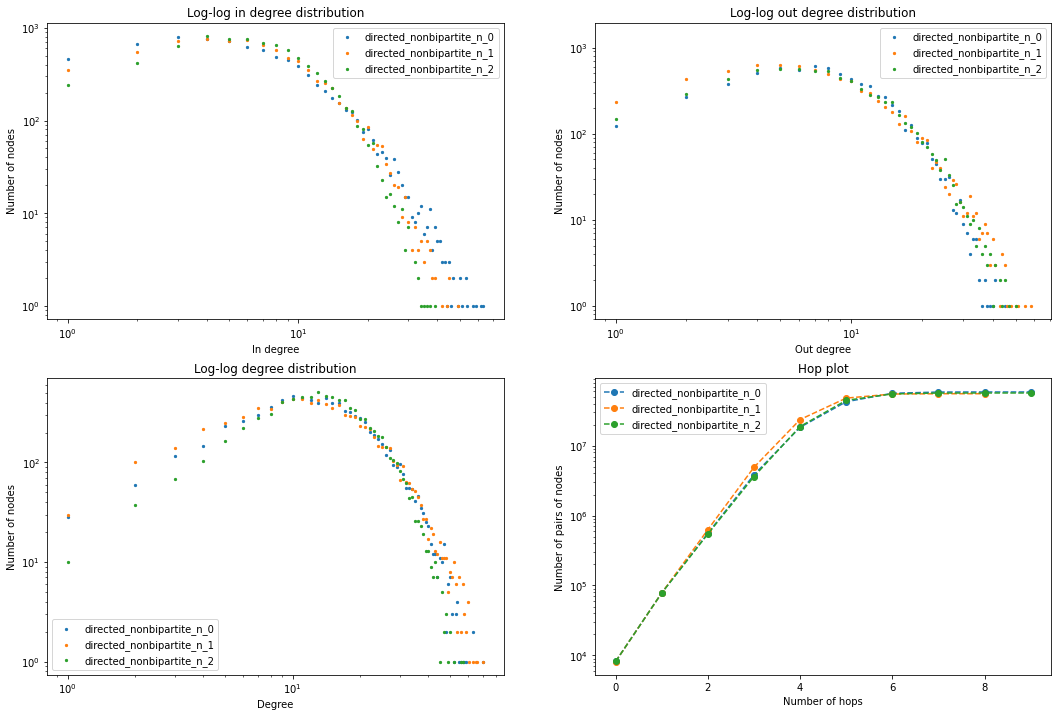

In [6]:
is_directed = True
is_bipartite = False
nodes = 2 ** 13
edges = 2 ** 16
graphs = generate_graphs(is_bipartite=is_bipartite, nodes=nodes, edges=edges, is_directed=is_directed, noise=0.5)
graphs = convert_to_snap(graphs, 'directed_nonbipartite_n', is_directed=is_directed)
analyze(graphs)

<a id="2"></a>
### Unidirected nonbipartite graphs

,Category,Statistic,unidirected_nonbipartite_0,unidirected_nonbipartite_1,unidirected_nonbipartite_2
0,Global stats,Nodes,15927,15906,15925
1,Global stats,Edges,32768,32768,32768
2,Global stats,Density,0.0003,0.0003,0.0003
3,Global stats,Average degree,2.06,2.06,2.06
4,Global stats,Zero deg nodes,0,0,0
5,Global stats,Zero in deg nodes,0,0,0
6,Global stats,Zero out deg nodes,0,0,0
7,Global stats,Self loops,0,0,0
8,Global stats,Bidirectional edges,32768,32768,32768
9,Global stats,Unique undirected edges,32768,32768,32768


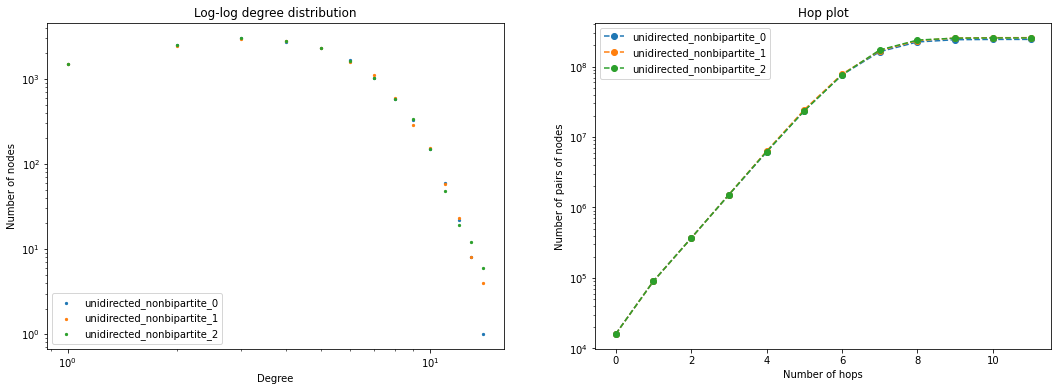

In [7]:
is_directed = False
is_bipartite = False
nodes = 2 ** 14
edges = 2 ** 15
graphs = generate_graphs(is_bipartite=is_bipartite, nodes=nodes, edges=edges, is_directed=is_directed, noise=0.0)
graphs = convert_to_snap(graphs, 'unidirected_nonbipartite', is_directed=is_directed)
analyze(graphs)

### Unidirected nonbipartite graphs with noise

,Category,Statistic,unidirected_nonbipartite_n_0,unidirected_nonbipartite_n_1,unidirected_nonbipartite_n_2
0,Global stats,Nodes,14859,15070,15397
1,Global stats,Edges,32768,32768,32768
2,Global stats,Density,0.0003,0.0003,0.0003
3,Global stats,Average degree,2.21,2.17,2.13
4,Global stats,Zero deg nodes,0,0,0
5,Global stats,Zero in deg nodes,0,0,0
6,Global stats,Zero out deg nodes,0,0,0
7,Global stats,Self loops,0,0,0
8,Global stats,Bidirectional edges,32768,32768,32768
9,Global stats,Unique undirected edges,32768,32768,32768


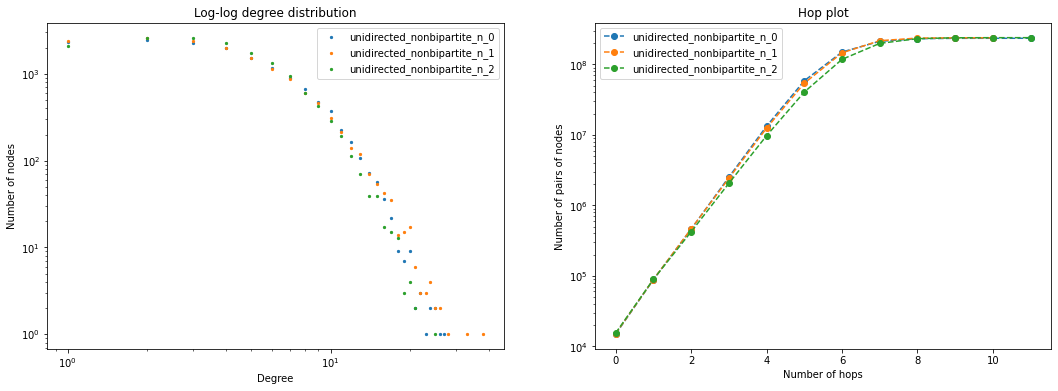

In [8]:
is_directed = False
is_bipartite = False
nodes = 2 ** 14
edges = 2 ** 15
graphs = generate_graphs(is_bipartite=is_bipartite, nodes=nodes, edges=edges, is_directed=is_directed, noise=0.5)
graphs = convert_to_snap(graphs, 'unidirected_nonbipartite_n', is_directed=is_directed)
analyze(graphs)

<a id="3"></a>
### Directed bipartite graphs

,Category,Statistic,directed_bipartite_0,directed_bipartite_1,directed_bipartite_2
0,Global stats,Nodes,8446,8446,8446
1,Global stats,Edges,69632,69632,69632
2,Global stats,Density,0.001,0.001,0.001
3,Global stats,Average degree,8.24,8.24,8.24
4,Global stats,Zero deg nodes,0,0,0
5,Global stats,Zero in deg nodes,0,0,0
6,Global stats,Zero out deg nodes,5178,5163,5085
7,Global stats,Self loops,0,0,0
8,Global stats,Bidirectional edges,122,123,113
9,Global stats,Unique undirected edges,69510,69509,69519


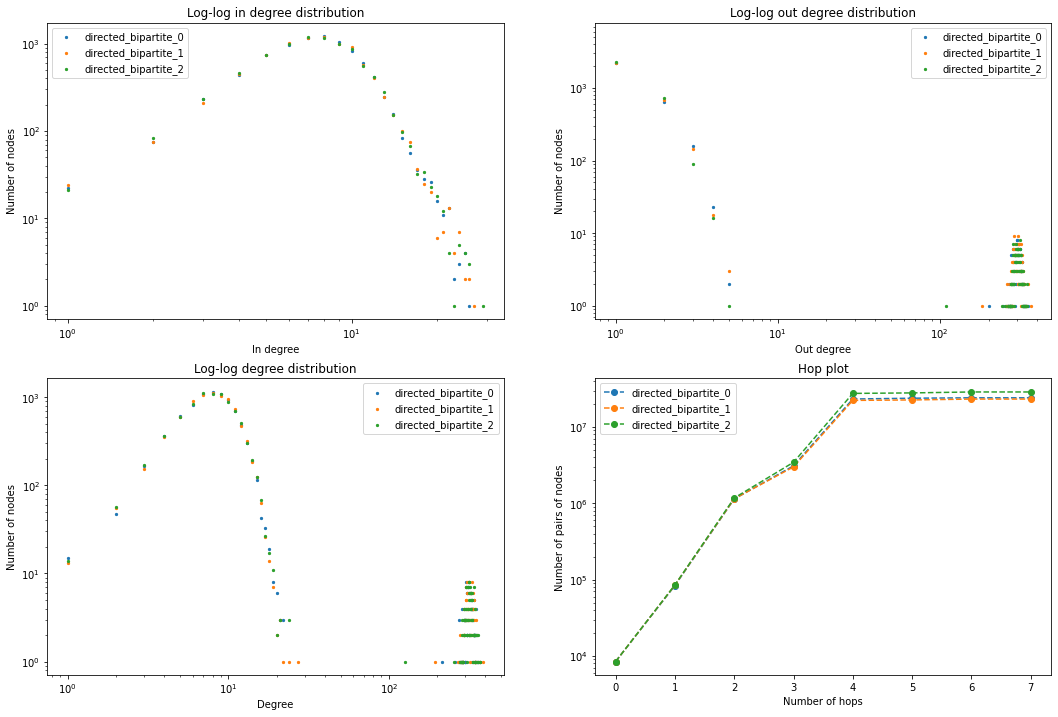

In [9]:
is_directed = True
is_bipartite = True
nodes = 2 ** 13, 2 ** 8
edges = 2 ** 12, 2 ** 16
graphs = generate_graphs(is_bipartite=is_bipartite, nodes=nodes, edges=edges, is_directed=is_directed)
graphs = convert_to_snap(graphs, 'directed_bipartite', is_directed=is_directed)
analyze(graphs)

### Directed bipartite graphs with noise

,Category,Statistic,directed_bipartite_n_0,directed_bipartite_n_1,directed_bipartite_n_2
0,Global stats,Nodes,8367,8422,8375
1,Global stats,Edges,69632,69632,69632
2,Global stats,Density,0.001,0.001,0.001
3,Global stats,Average degree,8.32,8.27,8.31
4,Global stats,Zero deg nodes,0,0,0
5,Global stats,Zero in deg nodes,40,16,20
6,Global stats,Zero out deg nodes,5209,5297,5370
7,Global stats,Self loops,0,0,0
8,Global stats,Bidirectional edges,128,105,168
9,Global stats,Unique undirected edges,69504,69527,69464


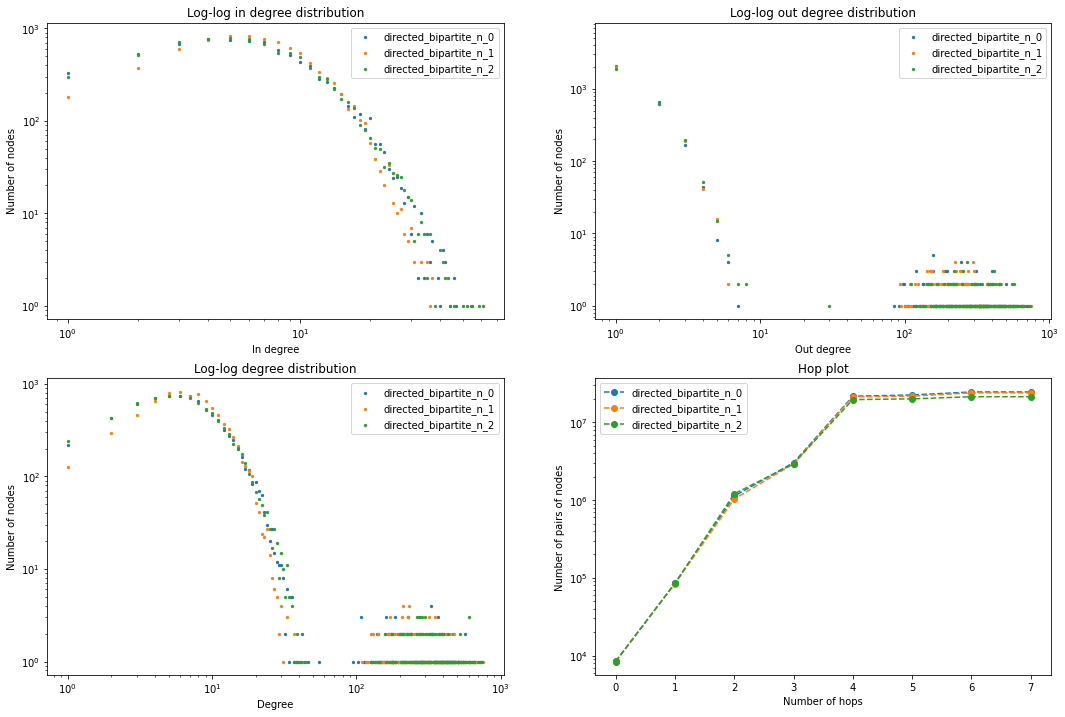

In [10]:
is_bipartite = True
nodes = 2 ** 13, 2 ** 8
edges = 2 ** 12, 2 ** 16
is_directed = True
graphs = generate_graphs(is_bipartite=is_bipartite, nodes=nodes, edges=edges, is_directed=is_directed, noise=0.5)
graphs = convert_to_snap(graphs, 'directed_bipartite_n', is_directed=is_directed)
analyze(graphs)

<a id="4"></a>
### Unidirected bipartite graphs

,Category,Statistic,unidirected_bipartite_0,unidirected_bipartite_1,unidirected_bipartite_2
0,Global stats,Nodes,3961,3965,3948
1,Global stats,Edges,32768,32768,32768
2,Global stats,Density,0.0042,0.0042,0.0042
3,Global stats,Average degree,8.27,8.26,8.3
4,Global stats,Zero deg nodes,0,0,0
5,Global stats,Zero in deg nodes,0,0,0
6,Global stats,Zero out deg nodes,0,0,0
7,Global stats,Self loops,0,0,0
8,Global stats,Bidirectional edges,32768,32768,32768
9,Global stats,Unique undirected edges,32768,32768,32768


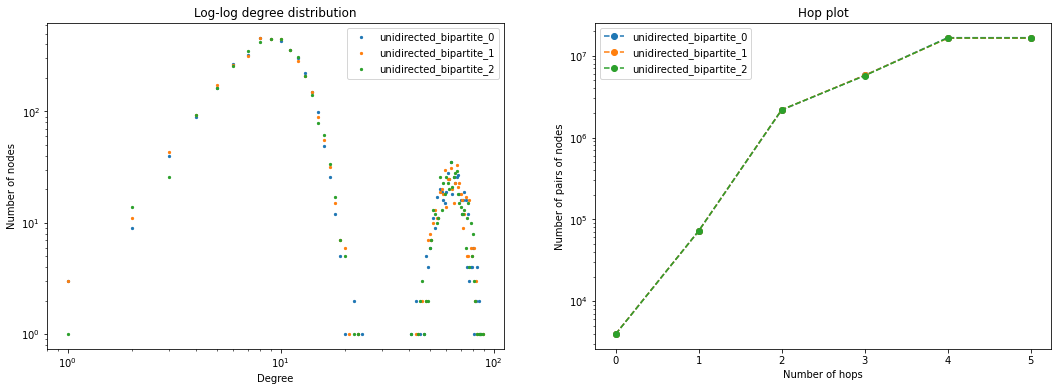

In [11]:
is_bipartite = True
nodes = 2 ** 12, 2 ** 9
edges = 2 ** 15, 2 ** 15
is_directed = False
graphs = generate_graphs(is_bipartite=is_bipartite, nodes=nodes, edges=edges, is_directed=is_directed)
graphs = convert_to_snap(graphs, 'unidirected_bipartite', is_directed=is_directed)
analyze(graphs)

### Unidirected bipartite graphs with noise

,Category,Statistic,unidirected_bipartite_n_0,unidirected_bipartite_n_1,unidirected_bipartite_n_2
0,Global stats,Nodes,4041,3871,3728
1,Global stats,Edges,32768,32768,32768
2,Global stats,Density,0.004,0.0044,0.0047
3,Global stats,Average degree,8.11,8.46,8.79
4,Global stats,Zero deg nodes,0,0,0
5,Global stats,Zero in deg nodes,0,0,0
6,Global stats,Zero out deg nodes,0,0,0
7,Global stats,Self loops,0,0,0
8,Global stats,Bidirectional edges,32768,32768,32768
9,Global stats,Unique undirected edges,32768,32768,32768


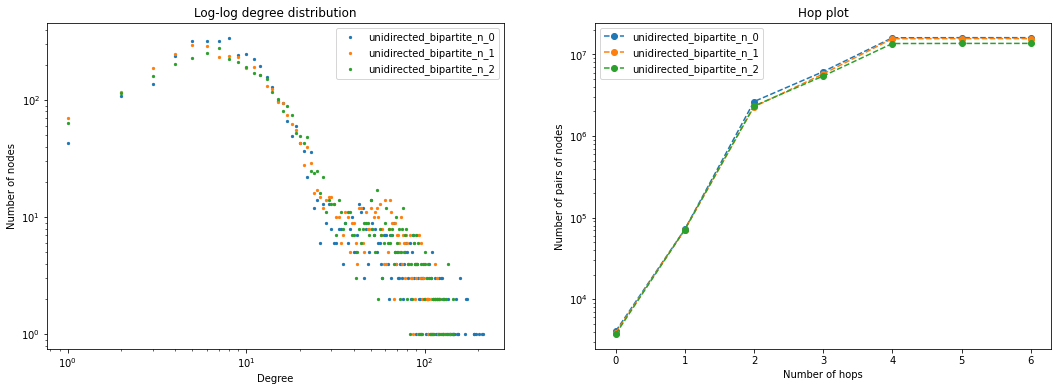

In [12]:
is_bipartite = True
nodes = 2 ** 12, 2 ** 9
edges = 2 ** 15, 2 ** 15
is_directed = False
graphs = generate_graphs(is_bipartite=is_bipartite, nodes=nodes, edges=edges, is_directed=is_directed, noise=0.5)
graphs = convert_to_snap(graphs, 'unidirected_bipartite_n', is_directed=is_directed)
analyze(graphs)